# Procesamiento de datos
Fecha: 30 Marzo 2022 

Clase: 6

## Indice
1. Transformación de variables <br>
1.1. Escalado <br>
1.2. Estandarización (Normalización?) <br>
2. Transformación de variables con Python <br>
2.1 Escalado de máximo absoluto <br>
2.2 Escalado de mínimo-máximo <br>
2.3 2.3. Escalado de z-score (unidad tipificada) <br>
2.4 Estandarización de Box-Cox <br>
2.5 qqplots para comprobar "normalidad" <br>




1- Importa los paquetes necesarios: <br>
Importa numpy con el alias np.<br>
Importa pandas con el alias pd. <br>
Importa matplotlib con el alias plt.<br>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 1. Transformaciones de variables

En esta clase intentaremos explicar la **diferencia entre escalar y estandarizar** una variable.  

Aviso: Junto con normalizar, escalar y estandarizar a veces se usan indistintamente. Sin embargo, aunque parecidas, no son los mismo!

Tanto al escalar como al estandarizar una variable, **se están transformando sus valores para que una vez transformados tengan propiedades útiles específicas**. Estas propiedades se pueden aprovechar para crear mejores características y modelos.

## 1.1. Escalado

Escalar significa cambiar la escala de un conjunto de datos, es decir, **cambiar el rango de valores del conjunto de datos, para que se ajusten a una escala específica**, como 0 a 1, o 0 a 100. Por ejemplo, es posible escalar un rango de edades de 15 a 35 hasta un rango de 0 a 1. Sin embargo, su forma (o distribución) no cambia.

**Una disparidad en la escala puede frenar o incluso impedir la convergencia de los modelos basados en gradientes**. Esta disparidad también se convierte en un problema importante para los algoritmos que utilizan la distancia euclidiana entre dos puntos de datos en sus cálculos. Por ejemplo, al usar support vector machines (SVM) o algoritmos de clustering o agrupamiento como k nearest neighbours (KNN).

## 1.2. Estandarizado 

La estandarización es una transformación más radical. Consiste en **cambiar los valores de los datos para que puedan describirse como una distribución normal**.

Repaso: Una distribuón Normal o Gaussiana es la distribución estadística donde las observaciones aproximadamente iguales caen por encima y por debajo de la media. La media y la mediana son aproximadamente iguales. Tiene forma de campana, es decir, hay más observaciones en torno a la media que en torno a los extremos.

Dicho de otra manera, estandarizar significa cambiar los valores de los datos para que la desviación estándar de los datos sea igual a 1 (varianza unitaria). Esto a menudo va de la mano con la eliminación de la media de la distribución (estableciendo la media = 0). Así se tiende a cambiar la forma de los datos hacia la forma de una distribución normal. Los datos a menudo se escalan implícitamente cuando se estandarizan.

Si se va a utilizar una técnica de aprendizaje automático o de estadística que asume que los datos a estudiar se distribuyen siguiendo una curva gaussiana, **combiene que los datos esten estandarizados (o normalizados)**. 



En general, **los modelos de aprendizaje automático funcionan mejor cuando las caracteristicas siguen una distribución aproximadamente normal y sus escalas son similares**.

# 2. Transformación de variables con Python

Como ejemplo, vamos a trabajar con el conjunto de datos flor Iris. Vamos a comenzar la clase repasando algunas herramientas. <br>
**Ejercicio de repaso:** Carga el set de datos y muestra las últimas cuatro filas.

**Ejercicio de repaso:** Como podemos obtener los elemntos únicos de la variable Species?

**Ejercicio de repaso:** Ahora queremos crear tres conjuntos de datos, cada uno para cada variedad de flor. Los llamaremos df_setosa, df_versicolor y df_virginica. Puedes hacerlo de forma automática (imagina el caso en el que tuviésemos muchas mas variedades?

**Ejercicio de repaso:** Crea un diagrama de cajas para el df_setosa. Recuerda poner los nombres de cada variable en diagonal o en vertical para que puedan leerse bien.

En esta ocasión, el valor de cada Id no nos aporta mucha información. Mantendremos esta variable para los siguientes ejercicios, pero sabrías como rehacer el plot sin ella?

Cuando hacemos el diagrama de cajas de las cuatro variables, encontramos que se mueven en un rango de valores diferentes. Aunque quizá la forma de su distribución no es tan evidente.

**Ejercicio de repaso:** Una alternativa al diagrama de cajas sería sacar la función de distribución. Puedes utilizar Pandas para graficar la estimación de densidad kernel (kde) de las variables Sepal y Petal Length y Width en cm.

## 2.1. Escalado de máximo absoluto

El escalado de máximo absoluto consiste en dividir todos los valores del conjunto de datos por el valor máximo para esa variable. Los valores resultantes estarán entonces entre el cero y el uno.


<h1><center>  $\hat X_i = \frac{X_i}{X_{max}}  $ </center></h1>

**Ejercicio:** Como puedes transformar los datos del DataFrame? Dibuja el diagrama de cajas resultante.

**Ejercicio: ** La librería Scikit-learn tiene muchas herramientas de procesado. Como harías el ejercicio anterior usando MaxAbsScaler de sklearn.preprocessing?

**Ejercicio: ** Como han cambiado las métricas de descripcion estadística básica con la transformación? Usa describe para ver los cambios:

**Ejercicio:** Que cambios observas?

**Ejercicio:** Y la forma de la distribución? Ha cambiado? Compruebalo con alguna de las variables.

**Ejercicio:** Ahora usa alguna de las técnicas de eliminación de outliers que vimos la semana pasada. Que cambios observas al escalar los nuevos datos?

## 2.2. Escalado de mínimo-máximo

El escalado de mínimo-máximo consiste en restar el mínimo de todos los valores del conjunto de datos y dividirlo por el valor máximo menos el mínimo para esa variable. Los valores resultantes estarán entonces entre el cero y el uno.


<h1><center>  $\hat X_i = \frac{X_i - X_{min}}{X_{max}-X_{min}}  $ </center></h1>

**Ejercicio:** Como puedes transformar los datos del DataFrame de forma analítica?

**Ejercicio: ** La librería Scikit-learn tiene muchas herramientas de procesado. Como harías el ejercicio anterior usando MinMaxScaler de sklearn.preprocessing? Dibuja el diagrama de cajas resultante. Que observas ahora?

**Ejercicio:** Y la forma de la distribución? Ha cambiado? Compruebalo con alguna de las variables.

Como podrás observar, los outliers parecen condicionar el resultado. Es así de verdad? Que pasa si los eliminas? 
**Ejercicio:** Compara los datos originales con los datos escalados pero sin outliers.

## 2.3. Escalado de z-score (unidad tipificada)

Este tipo de escalado fué introducido en la clase anterior en el contexto de detección de outliers. 

Recordamos que el valor z de un elemento de una distribución normal viene definido como

<h1><center>  $ Z = \frac{x_i - \mu}{\sigma} $ </center></h1>

Es decir, dadas la media y la desviación estandard de una distribución, **el valor Z de un elemento nos dice como de lejos de la media esta un valor en unidades de std**. 


**Ejercicio:** Implementa esta transformación en el DataFrame anterior.

**Ejercicio**: Y la forma de la densidad de distribución? Ha cambiado? Compruebalo con alguna de las variables. Que observas?

## 2.4 Estandarización de Box-Cox


Uno de los métodos de transformación de variables es la llamada transformación de Box-Cox. 

Esta transformación busca el valor de lambda para el que la distribución transformada está más cercana a la
distribución normal:<br>
• Si lambda = 0, se aplica transformación logarítmica. <br>
• Si lambda = ½, se aplica una raíz cuadrada. <br>
• Si lambda = -1, se aplica una transformación 1/x. <br>

X tilde corresponde a la media geométrica de la variable x.

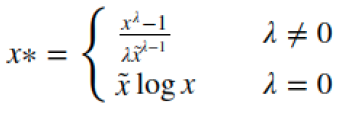

Dicho de otra manera, esta transformación consiste en considerar todos los valores del exponente λ (que varia de -5 a 5) y seleccionar su valor óptimo que consigue la mejor aproximación a una curva de distribución gaussiana.

Esta transformación sólo acepta x positivas. Tenemos alternativas como la transformación de Yeo-Johnson.

**Ejercicio:** Crea una distribución gamma con Numpy (parámetros shape, scale = 2.5, 2, por ej). Calcula su transformación de Box-Cox y grafica los histogramas antes y después de transformar los datos. Una forma de calcular la transformada de Box-Cox es usar stats.boxcox de scipy

Podemos utilizar este valor de la lambda para transformar otro array usando la misma transformación.

**Ejercicio:** Como podemos comparar la normalidad de las distribuciones antes y despues? Crea un dataframe con los valores de la media, mediana y moda antes y después de la estandarización. Crea otro similar con sus curtosis y asimetria (skew(axis=0) and kurt(axis=0)).

## 2.5 qqplots para comprobar "normalidad"


El gráfico qqplot, o gráfico cuantil-cuantil, comprueba si dos muestras provienen de la misma distribución. De un vistazo permite comparar dos distribuciones o determinar la presencia de datos aislados que contaminan alguna muestra

Para ello utilizamos lo que se conoce como un qq-plot. 

Una distribución que sea idealmente normal aparecerá representada en la recta a 45º del qq-plot.

**Ejercicio: ** Con ayuda de, por ej, la librería stats, saca el qqplot del los datos originales y transformados.



En muchas situaciones, ya sea en análisis de datos o en preprocesado de
datos, necesitaremos aplicar transformaciones a las variables para que
presenten una distribución más parecida a la distribución normal. Aquí tenemos algunos otros ejemplos.


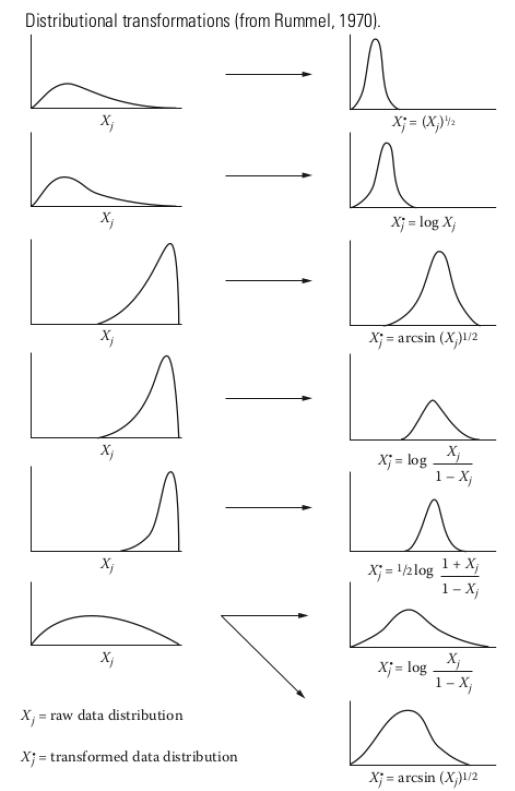

Nota: Para utilizar estas transformaciones dentro de un contexto
de Machine Learning tendremos que estar seguros de
poder separar la información de los conjuntos de
entrenamiento y de test.
De lo contrario, incurriremos en lo que se conoce como
data leaking.


**Ejercicio:** Prueba las dos primeras transformaciones de la gráfica en los datos de la distribución gamma. Cual te parece que funciona mejor? Porque?